<div style="border:solid black 2px; padding: 20px">

# Reviewer's feedback v.1

**Halo Wahyudi**
    
**Greetings from Chamdani**

Terima kasih telah mengirimkan project kamu dengan ini kamu sudah memulai sebuah langkah yang luar biasa saat ini. Disini saya akan mereview proyek kamu ya.

Saya akan memberikan beberapa komentar dan feedback seperti dibawah ini, **mohon jangan dipindah, dirubah, maupun dihapus ya :).**
    
> Mohon diperhatikan bahwa apabila ada temuan atau kesalahan yang sama namun tidak ada komentar perbaikan disana, itu berarti kamu masih tetap harus memperbaikinya yaa.

Komentar yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

</div>

<div class="alert alert-success">
<b>Chamdani's comment v.*</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

<div class="alert alert-warning">
<b>Chamdani's comment v.*</b> <a class="tocSkip"></a>

Ada beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Chamdani's comment v.*</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan.

</div>

<div class="alert alert-info">
<b>Chamdani's info v.1</b> <a class="tocSkip"></a>

Catatan umum:
* Fungsi `print` tidak diperlukan untuk mencetak suatu nilai
* Lebih baik tulis kode pada bagian akhir cell code untuk menampilkan output tanpa `print`
* Perintah soal yang ada dalam tanda kurung siku `[...]` sebaiknya dihilangkan
* Sangat disarankan untuk menggunakan cell markdown untuk memberikan deskripsi temuan atau kesimpulan.
* Tidak disarankan menggunakan cell code untuk memberikan penjelasan / deskripsi.
* Untuk menghindari galat pada notebook project kamu. Batasi jumlah output yang dikeluarkan setiap kode dengan batas max 10 baris data.

</div>

<div style="border:solid gray 5px; padding: 20px" class="alert alert-warning">

**INGATLAH** 
* Project kamu tidak akan bisa diterima bila kamu masih memiliki feedback berwarna merah. 
* Kamu hanya memiliki 3 kali kesempatan iterasi submission disetiap projectnya 
* Jika merasa kesulitan kamu dapat menuliskan responmu atas feedback saya menggunakan blok markdown warna biru dan kamu bisa mengirimkan project pada submission selanjutnya untuk mendapatkan jawaban / respon dari saya segera yaa

Kamu dapat menjawab saya dengan menggunakan blok berwarna biru seperti ini

<div class="alert alert-info">
<b>Student answer</b> <a class="tocSkip"></a>

Siap kak.

</div>

<div style="border:solid black 2px; padding: 20px" class="alert alert-success">
    
# General feedback v.1 *Project Accepted*

Terima kasih banyak telah mengirimkan proyek Anda! 
<br>
    
Secara keseluruhan, proyek Anda **SANGAT** mengesankan. Semoga apa yang kamu pelajari dalam project ini dapat membantu meningkatkan kemampuanmu. Pertahankan apa yang sudah bagus, dan tingkatkan apa yang menurutmu masih perlu ditingkatkan. Semoga berhasil pada project selanjutnya yaa :)

**TETAP SEMANGAT!!**
    
</div>

# Table of Contents

- EDA
- Data Processing
- Preparation for calculating profit
- Create Function to Calculate Profit
- Calculating confidence intervals
- Conclusion

# Project Description


Perusahaan minyak OilyGiant berniat akan melakukan eksplorasi sumur baru, tugas kita adalah mencari tempat terbaik untuk mengembangkan 200 titik sumur minyak baru tersebut. dimana perusahaan memiliki investasi 100 juta untuk 200 sumur minyak, sebuah sumur minyak rata-rata harus menghasilkan setidaknya 500 ribu USD untuk menghindari kerugian. Satu barel minyak mentah menghasilkan pendapatan sebesar 4,5 dolar. Nah, pendapatan dari satu unit produk adalah $4.500 (volume cadangan ditulis dalam ribuan barel).
Setelah kita menganalisis risiko yang ada, kita mempertahankan wilayah yang memiliki risiko kerugian kurang dari 2,5%.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!
</div>

## EDA

### Libraries

In [1]:
# Load all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from collections import defaultdict

# ml libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.neural_network import MLPRegressor

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!
</div>

### Data Preparation

In [2]:
# If run locally
try:
    df0 = pd.read_csv('datasets/geo_data_0.csv')
    df1 = pd.read_csv('datasets/geo_data_1.csv')
    df2 = pd.read_csv('datasets/geo_data_2.csv')

# If run on the platform
except:
    df0 = pd.read_csv('/datasets/geo_data_0.csv')
    df1 = pd.read_csv('/datasets/geo_data_1.csv')
    df2 = pd.read_csv('/datasets/geo_data_2.csv')

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!
</div>

#### Check Dataset

In [3]:
# df0
print(df0.info())
print(df0.describe())
df0.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.3437

,id,f0,f1,f2,product
73199,z3o1j,0.783585,-0.555084,2.614219,59.414729
58955,gTKkj,0.475157,0.791620,1.622652,111.935267
28459,tmZ5R,1.790601,-0.129360,-2.104832,117.416423
41872,aqJI9,1.592064,-0.286448,3.940004,80.788220
73905,e2mPy,0.567314,0.949970,0.187913,49.227307


In [4]:
# df1
print(df1.info())
print(df1.describe())
df1.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%         1.153055      -4.813172       2.011479      57.085625
75%         8.621015      -1.332816       3.999904     107.813044
max        29.421755      18.7340

,id,f0,f1,f2,product
53385,v5fXU,-8.361655,-4.796396,2.001350,57.085625
30963,QLGqV,-11.093352,-12.128133,1.009003,30.132364
88006,e288L,15.076468,-6.351626,0.999835,26.953261
21968,y6kDn,-0.991981,-17.995529,1.997870,57.085625
37359,xmUnK,-11.321670,-9.972623,1.995770,57.085625


In [5]:
# df2
print(df2.info())
print(df2.describe())
df2.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.002023      -0.002081       2.495128      95.000000
std         1.732045       1.730417       3.473445      44.749921
min        -8.760004      -7.084020     -11.970335       0.000000
25%        -1.162288      -1.174820       0.130359      59.450441
50%         0.009424      -0.009482       2.484236      94.925613
75%         1.158535       1.163678       4.858794     130.595027
max         7.238262       7.8448

,id,f0,f1,f2,product
88381,Tebgn,0.104535,-1.776619,7.729179,99.405890
6650,VshgM,0.824620,0.333841,-6.287497,22.921564
21715,ih1Pa,1.463838,3.270688,3.176862,119.178542
40137,tZj76,-1.739645,-0.640797,5.771408,115.407118
81110,nNKog,2.520088,-1.347796,1.350840,158.452410


Semua dataset memiliki 10000 baris yang menandakan tidak ada nilai yang hilang, fitur f0,f1,f2 memiliki nilai yang bervariasi dimana nilai-nilai tersebut berkorelasi terhadap berapa banyak minyak yang diproduksi pada setiap site. fitur produk juga memiliki nilai dari 0 sampai 191 unit.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!
</div>

#### Data Visualization

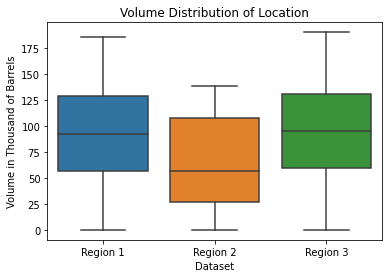

In [6]:
# merge `product` column from each datasets
oil = pd.concat([df0['product'], df1['product'], df2['product']],axis=1)
oil.columns = ['Region 1','Region 2','Region 3']

# create boxplot
sns.boxplot(data=oil)
plt.title('Volume Distribution of Location')
plt.ylabel('Volume in Thousand of Barrels')
plt.xlabel('Dataset')
plt.show()

Berdasarkan grafik boxplot, region 3 memiliki kandungan minyak terbanyak, dan region 2 memiliki kandungan minyak paling sedikit

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!
</div>

#### Corelation Table

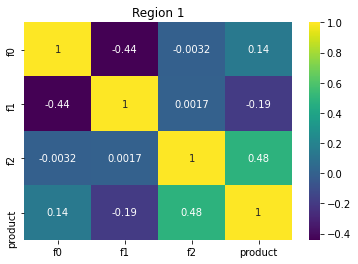

In [7]:
corr_tab1 = df0.select_dtypes(exclude='object').corr()
sns.heatmap(corr_tab1,annot=True,cmap='viridis').set_title('Region 1')
plt.show()

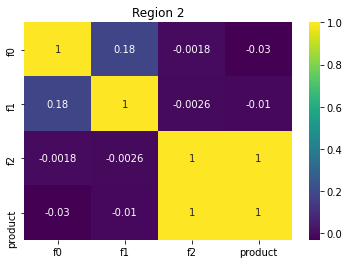

In [8]:
corr_tab2 = df1.select_dtypes(exclude='object').corr()
sns.heatmap(corr_tab2,annot=True,cmap='viridis').set_title('Region 2')
plt.show()

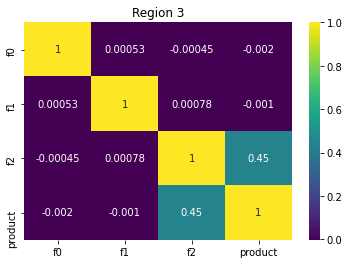

In [9]:
corr_tab3 = df2.select_dtypes(exclude='object').corr()
sns.heatmap(corr_tab3,annot=True,cmap='viridis').set_title('Region 3')
plt.show()

Berdasarkan tabel korelasi, variabel f2 memiliki korelasi tertinggi dengan product

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!
</div>

## Data Procesing 

### Spreading Dataset

Membagi dataset menjadi fitur dan target serta membagi persentase dataset menjadi 75% training dan 25% validasi

In [10]:
# Splitting data_0
train_0, val_0 = train_test_split(df0, train_size=0.75, random_state=12345)
print('train_0 set shape:', train_0.shape)
print('val_0 set shape:', val_0.shape)
print()

# Splitting data_1
train_1, val_1 = train_test_split(df1, train_size=0.75, random_state=12345)
print('train_1:', train_1.shape)
print('val_1 set shape:', val_1.shape)
print()

# Splitting data_2
train_2, val_2 = train_test_split(df2, train_size=0.75, random_state=12345)
print('train_2:', train_2.shape)
print('val_2 set shape:', val_2.shape)

train_0 set shape: (75000, 5)
val_0 set shape: (25000, 5)

train_1: (75000, 5)
val_1 set shape: (25000, 5)

train_2: (75000, 5)
val_2 set shape: (25000, 5)


In [11]:
#Split dataset into features and target
train_features0 = train_0.drop(['product','id'],axis=1)
train_target0 = train_0['product']
val_features0 = val_0.drop(['product','id'],axis=1)
val_target0 = val_0['product']

train_features1 = train_1.drop(['product','id'],axis=1)
train_target1 = train_1['product']
val_features1 = val_1.drop(['product','id'],axis=1)
val_target1 = val_1['product']

train_features2 = train_2.drop(['product','id'],axis=1)
train_target2 = train_2['product']
val_features2 = val_2.drop(['product','id'],axis=1)
val_target2 = val_2['product']

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!
</div>

### Standardization

<AxesSubplot:ylabel='Count'>

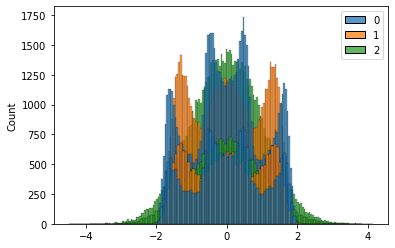

In [12]:
# data_0

## Creating an instance of the standard scaler
standard_scaler = StandardScaler()

## Fitting & transforming training set
### .values attribute excludes dataframe headers and prevent errors/warnings
train_features0 = standard_scaler.fit_transform(X=train_features0.values)

## Transforming validation set
val_features0 = standard_scaler.transform(X=val_features0.values)

## Checking transformed dataset
sns.histplot(data=train_features0)
sns.histplot(data=val_features0)

<AxesSubplot:ylabel='Count'>

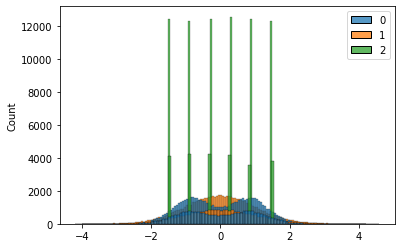

In [13]:
# data_1

## Creating an instance of the standard scaler
standard_scaler = StandardScaler()

## Fitting & transforming training set
### .values attribute excludes dataframe headers and prevent errors/warnings
train_features1 = standard_scaler.fit_transform(X=train_features1.values)

## Transforming validation set
val_features1 = standard_scaler.transform(X=val_features1.values)

## Checking transformed dataset
sns.histplot(data=train_features1)
sns.histplot(data=val_features1)

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!
</div>

<AxesSubplot:ylabel='Count'>

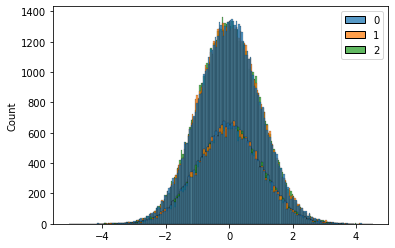

In [14]:
# data_2

## Creating an instance of the standard scaler
standard_scaler = StandardScaler()

## Fitting & transforming training set
### .values attribute excludes dataframe headers and prevent errors/warnings
train_features2 = standard_scaler.fit_transform(X=train_features2.values)

## Transforming validation set
val_features2 = standard_scaler.transform(X=val_features2.values)

## Checking transformed dataset
sns.histplot(data=train_features2)
sns.histplot(data=val_features2)

Histogram menunjukkan data berpusat disekitar rata-rata = 0 yang mengindikasikan standarisasi sukses

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!
</div>

### Predict average oil reserve volume

Melihat performa dari model machine learning menggunakan root mean square error (RMSE). Model yang kita buat adalah regresi linier dari scikit-learn.

In [15]:
def oil_pred(feature_train,feature_valid,target_train,target_valid):
    # create regression linear model
    model = LinearRegression()
    # training model with dataset training
    model.fit(feature_train,target_train)
    # predict average oil reserve volume
    vol = model.predict(feature_valid)
    # calculate RMSE
    rmse = mean_squared_error(target_valid,vol)**0.5
    return vol, rmse

In [16]:
vol_0, rmse_0 = oil_pred(train_features0, val_features0, train_target0, val_target0)
print('Average predicted reserve volume in region 1 :', round(vol_0.mean(),3))
print('RMSE of model predictions in region 1 :', round(rmse_0,3))

Average predicted reserve volume in region 1 : 92.593
RMSE of model predictions in region 1 : 37.579


In [17]:
vol_1, rmse_1 = oil_pred(train_features1, val_features1, train_target1, val_target1)
print('Average predicted reserve volume in region 2 :', round(vol_1.mean(),3))
print('RMSE of model predictions in region 2 :', round(rmse_1,3))

Average predicted reserve volume in region 2 : 68.729
RMSE of model predictions in region 2 : 0.893


In [18]:
vol_2, rmse_2 = oil_pred(train_features2, val_features2, train_target2, val_target2)
print('Average predicted reserve volume in region 3 :', round(vol_2.mean(),3))
print('RMSE of model predictions in region 3 :', round(rmse_2,3))

Average predicted reserve volume in region 3 : 94.965
RMSE of model predictions in region 3 : 40.03


Berdasarkan model, region 2 memiliki cadangan minyak terbanyak 94.965 ribu barel namun memiliki RMSE terbesar 40.03

region 1 mirip seperti region 2 memiliki cadangan minyak 92.593 ribu barel, dan memiliki RMSE sebesar 37.579

dan region 2 memiliki cadangan yang paling sedikit 68.729 ribu barel namun memiliki RMSE terbaik 0.893

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!
</div>

## Preparation for calculating profit

- Perusahaan OilyGiant memiliki investasi 100 juta USD untuk 200 sumur minyak
- sebuah sumur minyak rata-rata harus menghasilkan setidaknya 500 ribu USD untuk menghindari kerugian (ini setara dengan 111,1 unit)
- 1 unit (1000 barels) minyak menghasilkan pendapatan 4.500 USD

In [19]:
budget = 100000000
n_best = 200
price_vol = 4.5*1000

# mengetahui berapa unit produk yang bisa dihasilkan dari modal investasi untuk 200 lokasi
n_prod = budget/(price_vol*n_best)

print(f'The minimum reserve volume needed to reach ROI: {n_prod} thousand barrels')

The minimum reserve volume needed to reach ROI: 111.11111111111111 thousand barrels


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!
</div>

## Create Function to Calculate Profit

Untuk menghitung profit pada proyek ini kita dapat melakukan bootstrap pada data: mengulangi pengujian pada sampel acak dalam waktu yang cukup lama agar statistik mendekati parameter sebenarnya. Mengulangi proses ini 1000 kali seharusnya cukup untuk tujuan kita dengan pengambilan sebanyak 500 sampel untuk menentukan 200 lokasi.

In [20]:
def margin_profit(predict,target):
    pred = pd.Series(predict)
    tar = target.reset_index(drop=True)
    pred.sort_values(ascending=False,inplace=True)

    tar = tar[pred.index]
    # margin = [predict revenue total] - [revenue without lose total]
    margin = price_vol*(tar[:n_best].sum() - n_prod*n_best)

    # mengembalikan margin profit
    return margin

In [21]:
n_test = 1000
n_sample = 500

def profit_bootsrap(predict,target):
    margin = []
    predict = pd.Series(predict)
    target = target.reset_index(drop=True)
    random = np.random.RandomState(12345)

    # creat bootstrap to calculate revenue
    for i in range(n_test):
        # mengambil sampel sebanyak `n_point=500` dari data target
        tar_sample = target.sample(n_sample,replace=True,random_state=random)
        # mengambil nilai prediksi yang sesuai dengan indeks target sampel
        predict_sample = predict[tar_sample.index]
        # mereset indeks taget sampel
        tar_sample.reset_index(drop=True,inplace=True)
        # mereset indeks prediksi sampel
        predict_sample.reset_index(drop=True,inplace=True)
        # menghitung besarnya margin profit dan menambahkanya ke tempat penampungan `margin`
        margin.append(margin_profit(predict_sample,tar_sample))

    return margin

In [22]:
# menghitung margin profit menggunakan 200 titik terbaik untuk tiap dataset
reg1 = profit_bootsrap(vol_0,val_target0)
reg2 = profit_bootsrap(vol_1,val_target1)
reg3 = profit_bootsrap(vol_2,val_target2)

# menampilkan revenue 200 titik lokasi terbaik
print('Average Margin Profit Region-1 :',np.mean(reg1),'USD')
print('Average Margin Profit Region-2 :',np.mean(reg2),'USD')
print('Average Margin Profit Region-3 :',np.mean(reg3),'USD')

Average Margin Profit Region-1 : 3961649.84802371 USD
Average Margin Profit Region-2 : 4560451.057866606 USD
Average Margin Profit Region-3 : 4044038.665683566 USD


In [23]:
# menggabungkan hasil perhitungan bootstrapping
regeo1 = pd.Series(reg1,name='Region-1')
regeo2 = pd.Series(reg2,name='Region-2')
regeo3 = pd.Series(reg3,name='Region-3')
combine = pd.concat([regeo1,regeo2,regeo3],axis=1)

Region 2 memberikan rata-rate margin profit terbesar dengan ~4.5 juta USD, kemudian region 3, dan region 1 yang terendah dengan ~3.9 juta USD

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!
</div>

## Calculating confidence intervals

Semua wilayah mempunyai risiko kerugian. Perusahaan mengharuskan kita memilih hanya wilayah dengan risiko kerugian kurang dari 2,5% dan rata-rata keuntungan tertinggi.

Untuk menghitung risiko ini, kita akan menggunakan interval kepercayaan. Interval kepercayaan statistik sampel mengukur probabilitas mendapatkan parameter populasi sebenarnya dalam rentang/interval yang ditentukan. Kita ingin memiliki kemungkinan 95% bahwa rata-rata keuntungan sebenarnya berada dalam kisaran tersebut, jadi kita akan menetapkan interval kepercayaan kami menjadi 95%.

In [24]:
# confidence intervals 95%
cfd_interval = 0.95

# lost risk 2.5%
risk_threshold = 0.025

In [25]:
def cfd_risk(dif_rev,sample):
    low = round((1 - cfd_interval)/2,3)
    high = cfd_interval + low
    # calculating low quantille for margin profit
    low_cfd = dif_rev.quantile(low)
    # calculating high quantille for margin profit
    high_cfd = dif_rev.quantile(high)

    # calculating negative risk from margin profi
    negative = [neg for neg in dif_rev if neg < 0]
    # calculating percentage
    risk = len(negative)/sample*100
    return low_cfd, high_cfd, risk

In [26]:
# calculating confidence intervals & risk
low, high, risk = cfd_risk(regeo1,n_test)
print('Wilayah Region-1')
print('Rata-rata Margin Profit',round(np.mean(reg1),2),'USD')
print(f'Confidence Interval (95% Keyakinan) dari',round(low,2),'USD','hingga',round(high,2),'USD')
print('Persentase Risiko Negatif Revenue',risk,'%')

Wilayah Region-1
Rata-rata Margin Profit 3961649.85 USD
Confidence Interval (95% Keyakinan) dari -1112155.46 USD hingga 9097669.42 USD
Persentase Risiko Negatif Revenue 6.9 %


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!
</div>

In [27]:
# calculating confidence intervals & risk
low, high, risk = cfd_risk(regeo2,n_test)
print('Wilayah Region-2')
print('Rata-rata Margin Profit',round(np.mean(reg2),2),'USD')
print(f'Confidence Interval (95% Keyakinan) dari',round(low,2),'USD','hingga',round(high,2),'USD')
print('Persentase Risiko Negatif Revenue',risk,'%')

Wilayah Region-2
Rata-rata Margin Profit 4560451.06 USD
Confidence Interval (95% Keyakinan) dari 338205.09 USD hingga 8522894.54 USD
Persentase Risiko Negatif Revenue 1.5 %


In [28]:
# calculating confidence intervals & risk
low, high, risk = cfd_risk(regeo3,n_test)
print('Wilayah Region-3')
print('Rata-rata Margin Profit',round(np.mean(reg3),2),'USD')
print(f'Confidence Interval (95% Keyakinan) dari',round(low,2),'USD','hingga',round(high,2),'USD')
print('Persentase Risiko Negatif Revenue',risk,'%')

Wilayah Region-3
Rata-rata Margin Profit 4044038.67 USD
Confidence Interval (95% Keyakinan) dari -1633504.13 USD hingga 9503595.75 USD
Persentase Risiko Negatif Revenue 7.6 %


Region 2 memiliki rata-rata margin profit tertinggi, serta memenuhi syarat dari perusahaan memiliki risiko kerugian kurang dari 2,5%. Sehingga kita memutuskan untuk menggali sumur minyak di region 2

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!
</div>

# Conclusion

- Berdasarkan analisis boxplot, wilayah Region-3 memiliki rata-rata kandungan minyak paling tinggi dibandingkan wilayah lain.
- Tabel korelasi menunjukan hanya variabel/fitur f2 yang memiliki korelasi cukup baik dengan target product dibandingkan dengan variabel/fitur lain.
- Analisis dasar bisnis menunjukan jika kita tidak mengalami kerugian dengan modal investasi 100 juta USD untuk 200 titik, maka semua titik harus memproduksi sebanyak 111.11 ribu barel. Jika kita menggunakan rata-rata kandungan minyak untuk tiap wilayah, maka kita akan merugi, namun apabila kita hanya mengambil 200 titik terbaik maka kita akan mendapatatkan keuntungan
- Bootstrapping digunakan untuk melihat persebaran margin profit n risk (margin profit negatif) diperoleh risiko Region-1 sebesar 6.9%, risiko Region-2 sebesar 1.5% dan risiko Region-3 sebesar 7.6%.
- Wilayah Region-2 yang memenuhi kriteria dibawah risiko 2.5% dan memiliki rata-rata margin profit paling tinggi ~4.65 juta USD dengan 95% Keyakinan berada pada 338205.09 USD hingga 8522894.54 USD

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!
</div>